## K-Means Clustering: A Short Note

K-Means is an unsupervised machine learning algorithm used for clustering data points into groups (clusters) based on their similarity.

**How it works:**

1. **Choose K:**  Determine the desired number of clusters (K).
2. **Initialize Centroids:** Randomly place K centroids within the data space.
3. **Assign Points to Clusters:** Assign each data point to the nearest centroid.
4. **Update Centroids:** Recalculate the centroid of each cluster by averaging the coordinates of all data points assigned to it.
5. **Repeat Steps 3-4:** Iterate steps 3 and 4 until the centroids stabilize (i.e., they don't change significantly between iterations) or a maximum number of iterations is reached.


**Essentially, K-Means aims to:**

* Minimize the within-cluster variance (distance between points and their assigned centroid).
* Maximize the between-cluster variance (distance between different cluster centroids).


**Applications:**

* Customer segmentation
* Image compression
* Anomaly detection
* Document clustering


**Limitations:**

* Sensitive to initial centroid placement.
* Can get stuck in local optima.
* Assumes spherical clusters.


[Resource Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

# Data Preprocessing

## Import Library and Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
url = "https://raw.githubusercontent.com/SKY-TKP/AI-ENG/refs/heads/main/week10_dataset/Mall_Customers.csv"
df = pd.read_csv(url, sep = ",")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploration

In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


All data don't have NULL.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
## Drop Customer ID
df.drop(["CustomerID"], axis = 1, inplace = True)

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Box plot to see between gender

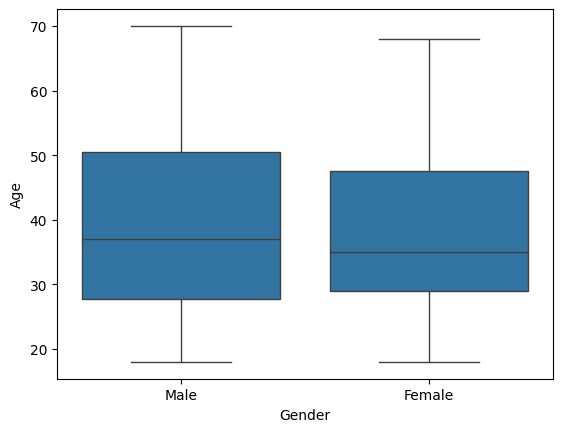

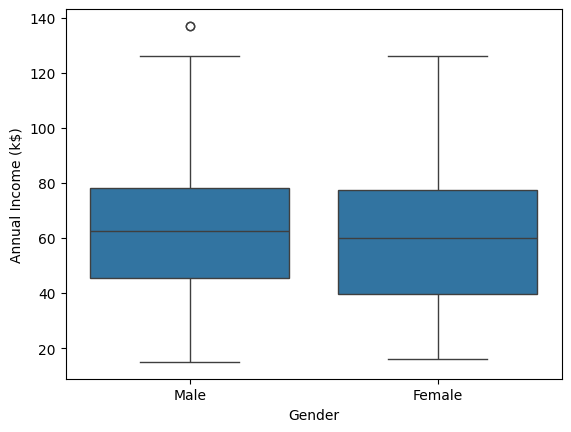

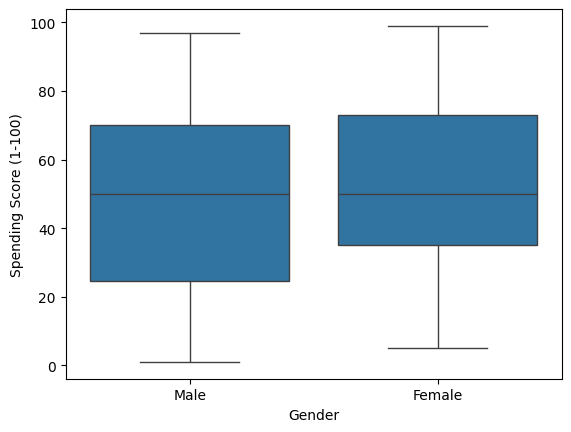

In [8]:
## Box plot to compare between
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[i])

In [9]:
df['Gender'].value_counts(normalize = True)

,proportion
Gender,
Female,0.56
Male,0.44


Because of same spread for all box plots, I think Gender is not help to clustering them

---

### Scatter Plot to see overview data

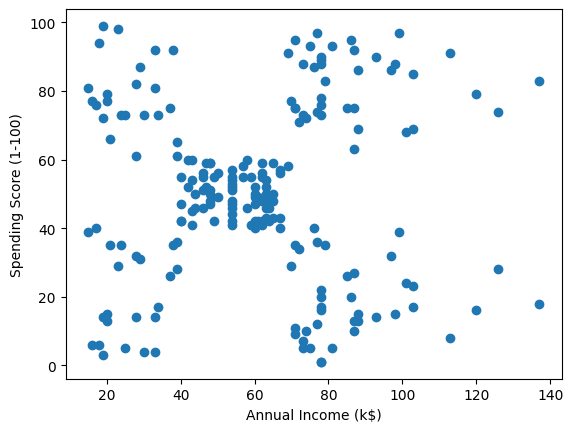

In [10]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Umm.... I guess, It has 6 clusters when plot Annual Income vs. Spending Score.

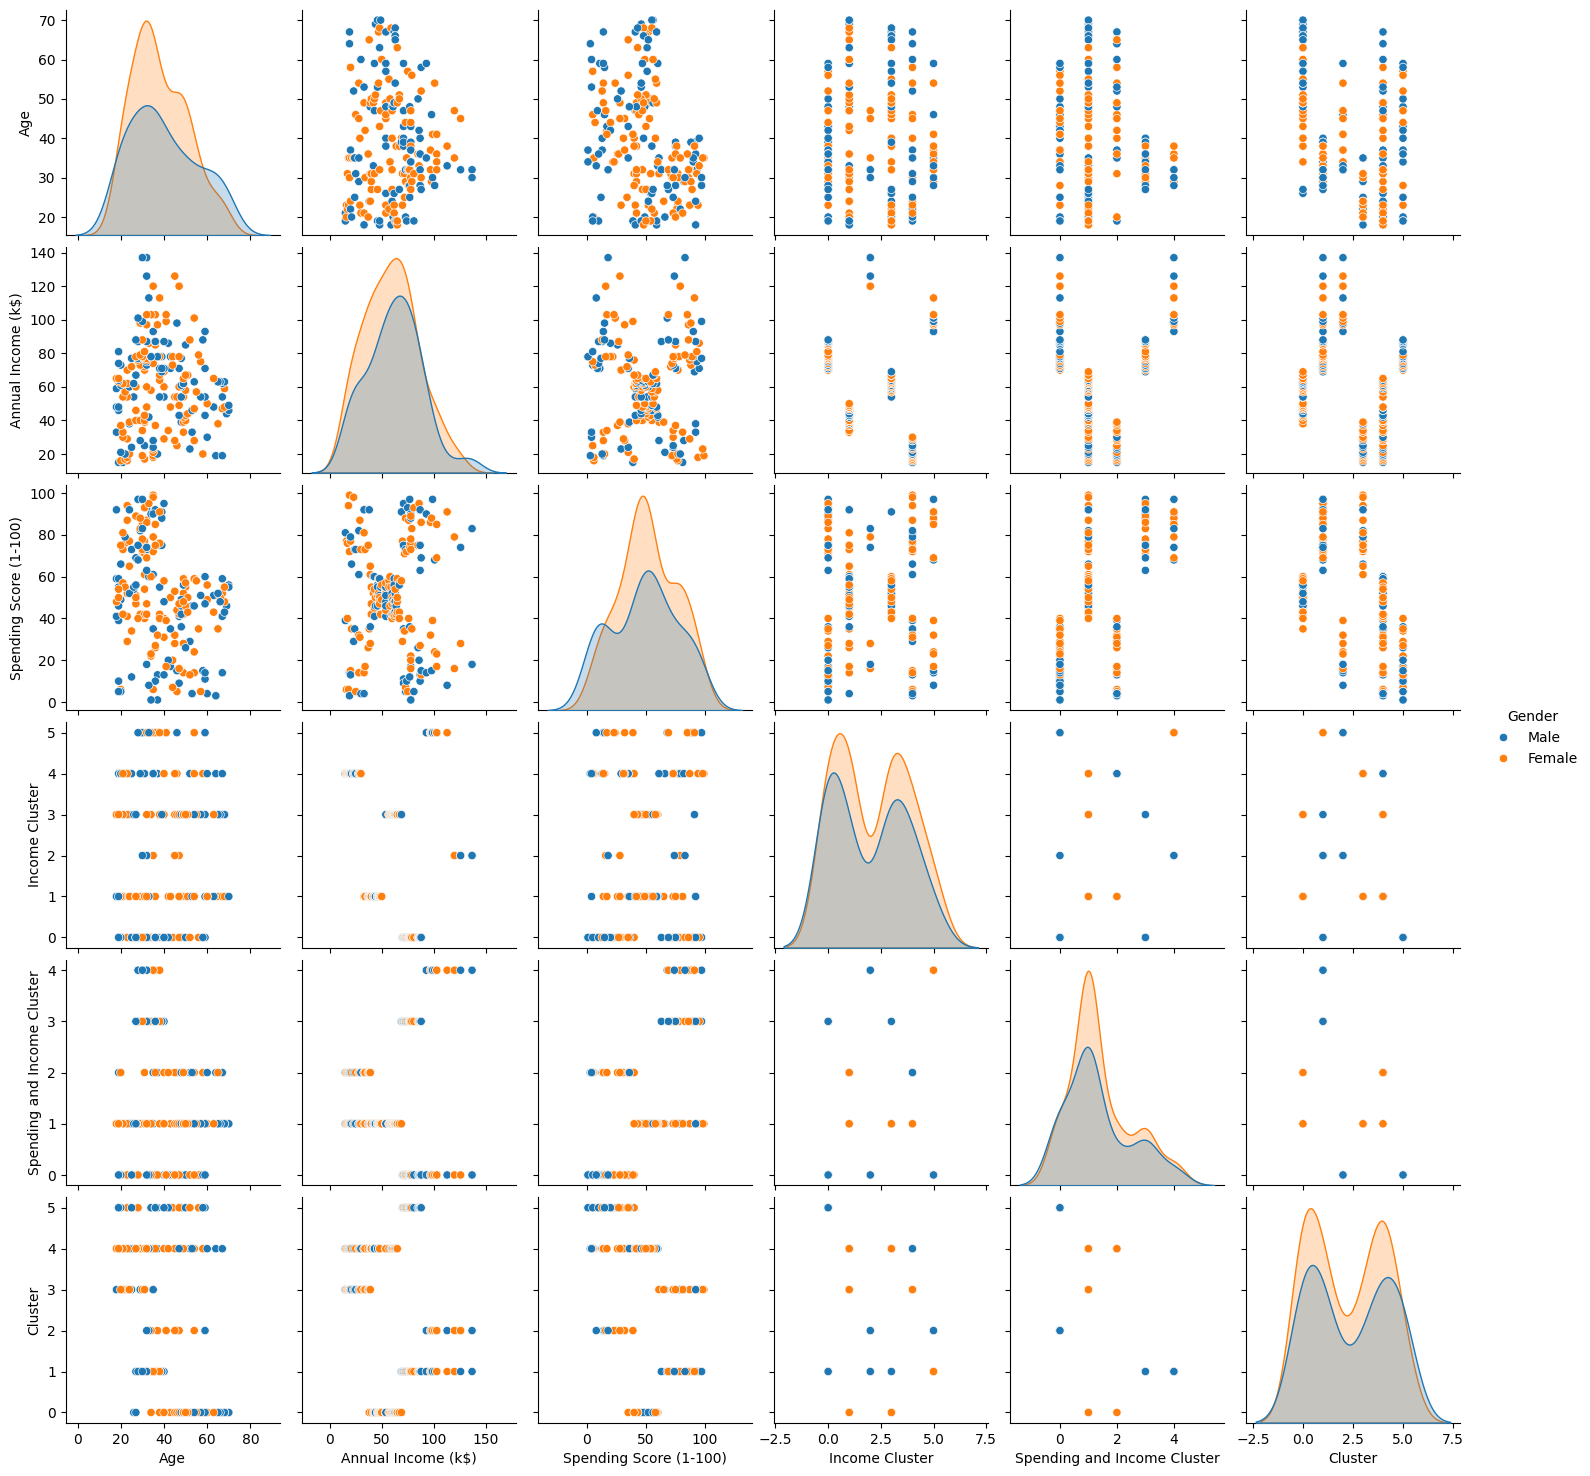

In [54]:
sns.pairplot(df, hue='Gender')
plt.savefig('pairplot.png')
plt.show()

In [12]:
df.corr(numeric_only = True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

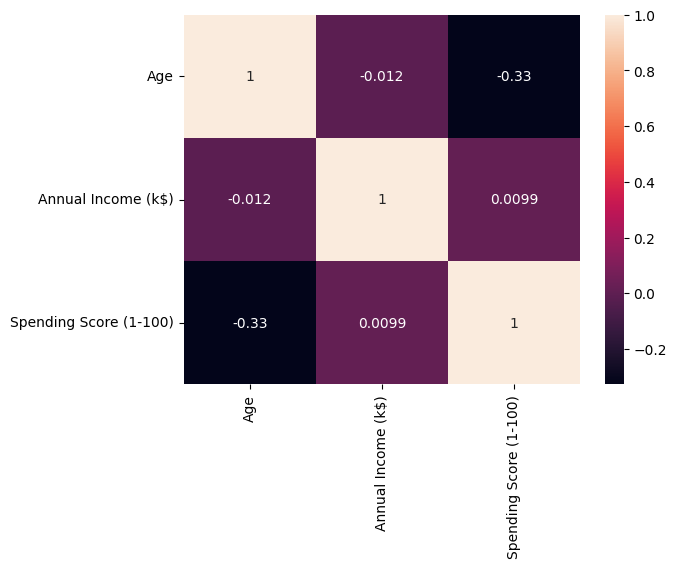

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

---
# Cluster It!

## Trial Modeling

So, I will use only Annual Income to cluster, so I think Annual Income is important to clustering the customers.

In [14]:
model = KMeans( n_clusters = 6 )
model.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=6)

In [15]:
model.cluster_centers_

array([[ 78.37037037],
       [ 42.23809524],
       [127.66666667],
       [ 60.44      ],
       [ 22.        ],
       [100.875     ]])

In [16]:
print(model.labels_)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2]


In [17]:
df['Income Cluster'] = model.labels_

In [18]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,2
197,Male,32,126,74,2
198,Male,32,137,18,2


In [19]:
df["Income Cluster"].value_counts()

,count
Income Cluster,
0,54
3,50
1,42
4,32
5,16
2,6


In [20]:
model.inertia_

5443.614973544972

I don't sure this is optimal k clustering, so I will do use Elbow method.

Note: Because of some dimension data to model, It's not have significantly to use!

---

## Selecting the "K" with Elbow method

In [21]:
X= df.iloc[:, [2,3]].values
#X

In [22]:
from tqdm import tqdm
# Run K-means for a set of k
distortions = []
models = []
K = range(1, 10 + 1)

for k in tqdm(K):
    model = KMeans(n_clusters = k)
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 121.65it/s]


### Plot distortions of K-Means

<ipython-input-55-d23ffcb974da>:3: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bx-" (-> linestyle='-'). The keyword argument will take precedence.

<ipython-input-55-d23ffcb974da>:3: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.



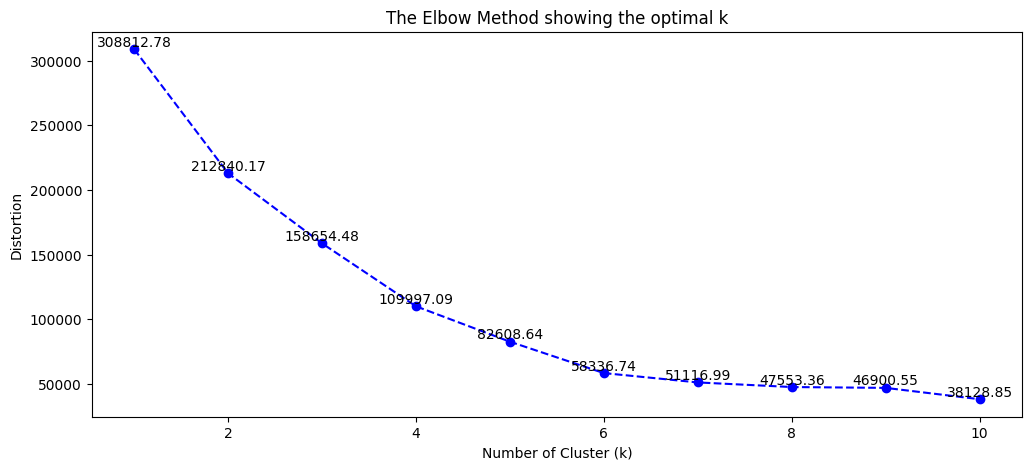

In [55]:
#Plotting the distortions of K-Means
plt.figure(figsize=(12, 5))
plt.plot(K, distortions, 'bx-', linestyle = "--", marker = "o")
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Add distortion values near the dashed line
for k, distortion in zip(K, distortions):
    plt.text(k, distortion, f'{distortion:.2f}', ha='center', va='bottom')

plt.savefig('elbow_method_2_vars.png')
plt.show()

## Clustering with k = 5, Optimal clustering

In [24]:
model2 = KMeans( n_clusters = 5 )
model2.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])

KMeans(n_clusters=5)

In [25]:
df['Spending and Income Cluster'] = model2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,1
2,Female,20,16,6,4,2
3,Female,23,16,77,4,1
4,Female,31,17,40,4,2


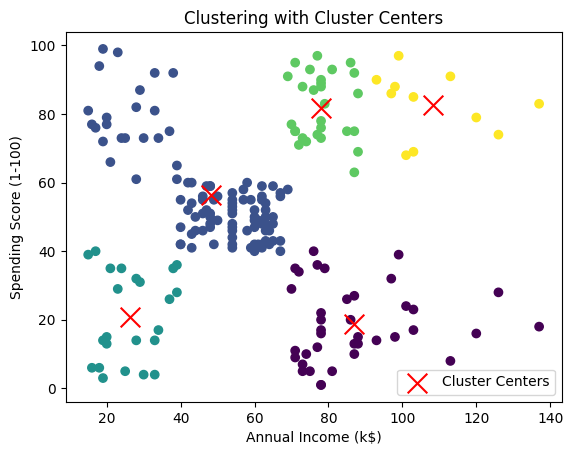

In [26]:
cluster_centers = model2.cluster_centers_

# Plot the cluster centers
plt.scatter(X[:, 0], X[:, 1], c=df["Spending and Income Cluster"])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.title("Clustering with Cluster Centers")
plt.show()

or, with a beautiful scatter plot

In [27]:
centers = pd.DataFrame(model2.cluster_centers_)
centers.columns = ['x', 'y']

In [63]:
import plotly.express as px
import plotly.graph_objects as go

# Create the scatter plot for clusters using Plotly
fig = px.scatter(df,
                 x = 'Annual Income (k$)',
                 y = 'Spending Score (1-100)',
                 color = 'Spending and Income Cluster',
                 color_discrete_sequence = px.colors.qualitative.Set2,
                 title = "Spending Score vs Annual Income")

# Add cluster centers with black star markers
fig.add_trace(go.Scatter(x=centers['x'],
                         y=centers['y'],
                         mode='markers',
                         marker=dict(size = 10, color = 'black', symbol = 'star'),
                         name='Cluster Centers'))

# Update layout
fig.update_layout(width = 800, height = 640)

# Show plot
fig.show()

### Interpretion

In [42]:
# 1. Cluster Centroids
print("Cluster Centroids (k=5):\n", model2.cluster_centers_)

# 2. Cluster Size:
print(df['Spending and Income Cluster'].value_counts())

# 3. Profile of Each Cluster:
for cluster_num in range(5):
  cluster_data = df[df['Spending and Income Cluster'] == cluster_num]
  print(f"\nCluster {cluster_num + 1}:")
  print( "Average Age:", round(cluster_data['Age'].mean(),0) )
  print( "Average Annual Income:", round(cluster_data['Annual Income (k$)'].mean(), 2) )
  print( "Average Spending Score:", round(cluster_data['Spending Score (1-100)'].mean(), 2))

Cluster Centroids (k=5):
 [[ 87.          18.63157895]
 [ 48.26        56.48      ]
 [ 26.30434783  20.91304348]
 [ 78.03571429  81.89285714]
 [108.18181818  82.72727273]]
Spending and Income Cluster
1    100
0     38
3     28
2     23
4     11
Name: count, dtype: int64

Cluster 1:
Average Age: 40.0
Average Annual Income: 87.0
Average Spending Score: 18.63

Cluster 2:
Average Age: 39.0
Average Annual Income: 48.26
Average Spending Score: 56.48

Cluster 3:
Average Age: 45.0
Average Annual Income: 26.3
Average Spending Score: 20.91

Cluster 4:
Average Age: 33.0
Average Annual Income: 78.04
Average Spending Score: 81.89

Cluster 5:
Average Age: 32.0
Average Annual Income: 108.18
Average Spending Score: 82.73


---

## (Optional)

100%|██████████| 10/10 [00:00<00:00, 47.73it/s]


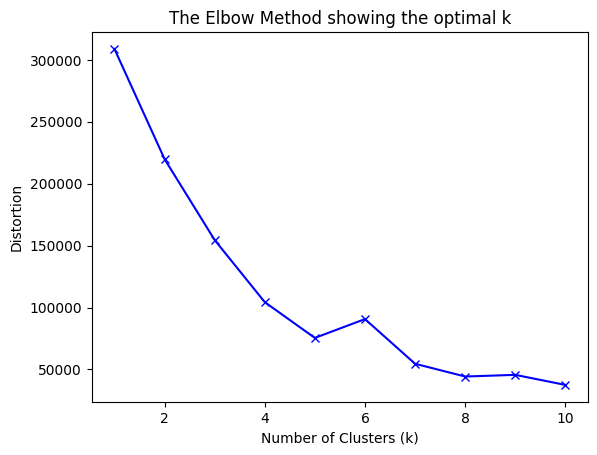

Cluster Centroids:
 [[44.48387097 35.42741935 59.87903226]
 [32.97560976 79.24390244 88.73170732]
 [25.77142857 68.51428571 29.97142857]]


In [64]:
X = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values

# Determine the optimal number of clusters (K) using the Elbow method
distortions = []
K = range(1, 11)  # Test K values from 1 to 10

for k in tqdm(K):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('elbow_method_3_vars.png')
plt.show()

# Based on the Elbow method, choose the optimal K (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# Analyze the clusters (e.g., calculate cluster centroids, visualize clusters)
cluster_centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", cluster_centroids)

From this picture, I think k = 6 is optimal clustering.

In [50]:
X = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values

kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)

# Assign cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    df,
    x='Age',
    y='Spending Score (1-100)',
    z='Annual Income (k$)',
    color='Cluster',
    title='3D Cluster Visualization (K = 6)',
)

# Add cluster centroids as markers
fig.add_trace(
    go.Scatter3d(
        x=cluster_centroids[:, 0],
        y=cluster_centroids[:, 1],
        z=cluster_centroids[:, 2],
        mode='markers',
        marker=dict(size=10, color = 'black', symbol = 'circle'),
        name='Cluster Centers',
    )
)

# Update layout
fig.update_layout(width=1000, height=800)

# Show plot
fig.show()


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


---

# Conclusion

This Colab notebook explores customer segmentation using K-Means clustering.  It analyzes customer data from a mall dataset with the goal of identifying distinct groups of customers based on their annual income and spending score.

**1. Introduction and K-Means Overview**
   - The notebook begins with a brief description of K-Means clustering, explaining its principles, how it works, and its common applications and limitations.
   - It also mentions the dataset used, which contains customer information including gender, age, annual income, and spending score.
   - [Resource Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

**2. Data Preprocessing**
   - **Import Libraries and Dataset:** Essential libraries like Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, and Plotly are imported.
   - **Exploratory Data Analysis (EDA):**
     - The dataset is loaded and initial exploration is performed using `df.head()`, `df.describe()`, and `df.isnull().sum()`.
     - The "CustomerID" column is removed as it is not relevant for clustering.
     - Box plots are generated to compare customer attributes (Age, Annual Income, Spending Score) by gender.
   - **Scatter plots and Pair plots:**
     - Scatter plots examine the relationship between annual income and spending score.  It suggests a potential structure for customer segmentation.
     - Pair plots show the relationships between all numerical variables and offer a more comprehensive view of the data.
   - **Correlation analysis:**
     - A correlation matrix and heatmap are created to examine the linear relationships between the numerical variables in the dataset.

**3. Clustering with K-Means**
   - **Trial Clustering:**
     - Initial K-Means clustering is performed with k=6. This is a trial attempt to understand the process.
     - The 'inertia' (within-cluster sum of squares) of the model is computed.
   - **Elbow Method:**
     - The elbow method is used to determine the optimal number of clusters (k) for K-Means. This method calculates the inertia for various values of k, helping find the point where adding more clusters doesn't significantly reduce the inertia.
   - **Clustering with Optimal K (k=5):**
     - K-Means clustering is then performed using the optimal number of clusters found using the elbow method.
     - The model is fit to annual income and spending score.
     - Cluster labels are added to the DataFrame.
   - **Visualizing Clusters:**
     - A scatter plot with cluster centers is created to visually show the identified customer segments.
     - The plots allows for the understanding of the customer segmentation into income and spending clusters.
     - A more beautiful plot is then created with a library Plotly, which allows the users to understand the customers clearly.



**Overall,** this notebook provides a clear example of how to use K-Means clustering for customer segmentation. It demonstrates effective data preprocessing and exploratory data analysis, proper determination of the number of clusters, and informative visualization to gain insights from the data.

In [39]:
# prompt: I want you to interpretion graph for k = 5 cluster

# Assuming you have already run the code and 'df' contains the cluster labels
# and the 'fig' variable holds the Plotly figure for k=5 clustering.

# You can directly display the Plotly figure for k=5 if you want to see it again:
fig.show()

# If you want a more specific interpretation, you can analyze the clusters further:

# 1. Cluster Centroids:
print("Cluster Centroids (k=5):\n", model2.cluster_centers_)
# Examine the coordinates of the cluster centroids to understand the characteristics of each cluster.
# For example, a cluster with high annual income and high spending score represents a different segment
# than a cluster with low annual income and low spending score.


# 2. Cluster Size:
print(df['Spending and Income Cluster'].value_counts())
# Analyzing the size of each cluster can provide insights into the relative importance of different customer groups.


# 3. Profile of Each Cluster:
# You can analyze the average characteristics of customers in each cluster.
for cluster_num in range(5):
  cluster_data = df[df['Spending and Income Cluster'] == cluster_num]
  print(f"\nCluster {cluster_num}:")
  print( "Average Age:", round(cluster_data['Age'].mean(),0) )
  print( "Average Annual Income:", round(cluster_data['Annual Income (k$)'].mean(), 2) )
  print( "Average Spending Score:", round(cluster_data['Spending Score (1-100)'].mean(), 2))
  # You can add more attributes to analyze as needed.


# Based on the cluster centroids and profiles, you can create an interpretation of the graph
# for k=5.

# For example:
# - Cluster 0 might represent customers with lower annual income and lower spending score.
# - Cluster 1 might represent customers with high annual income and high spending score.
# - Cluster 2 might represent customers with average annual income and average spending score.
# - Cluster 3 and 4 could be other distinct segments.

# You can then use this information to create targeted marketing campaigns, adjust product strategies,
# or improve customer service for each specific customer group.

Cluster Centroids (k=5):
 [[ 87.          18.63157895]
 [ 48.26        56.48      ]
 [ 26.30434783  20.91304348]
 [ 78.03571429  81.89285714]
 [108.18181818  82.72727273]]
Spending and Income Cluster
1    100
0     38
3     28
2     23
4     11
Name: count, dtype: int64

Cluster 0:
Average Age: 40.0
Average Annual Income: 87.0
Average Spending Score: 18.63

Cluster 1:
Average Age: 39.0
Average Annual Income: 48.26
Average Spending Score: 56.48

Cluster 2:
Average Age: 45.0
Average Annual Income: 26.3
Average Spending Score: 20.91

Cluster 3:
Average Age: 33.0
Average Annual Income: 78.04
Average Spending Score: 81.89

Cluster 4:
Average Age: 32.0
Average Annual Income: 108.18
Average Spending Score: 82.73
